# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-03-27 00:27:54--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-03-27 00:27:54--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [7]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [8]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


RESPUESTA: 1. customer_id: Identificar a cada cliente de forma única y poder rastrear sus compras y comportamientos
2. gender: Permite dividir a los clientes en grupos según su género, lo cual puede revelar diferencias en las preferencias de compra.
3. age: La edad es un factor demográfico crucial para segmentar por rango de edad y entender las necesidades y gustos de cada grupo.
4. category: Indica la categoría de productos que compra cada cliente, lo que permite segmentar según sus intereses y preferencias de compra.
5. Payment_method: El método de pago utilizado puede proporcionar información sobre las preferencias de pago de cada cliente y su nivel de comodidad con diferentes métodos.
6. invoice_date: Permite analizar las compras de cada cliente a lo largo del tiempo, lo que ayuda a identificar patrones de compra y la frecuencia de compra.
7. shopping_mall: Indica en qué centro comercial realiza la compra cada cliente, revelando sus preferencias de ubicación y qué tan lejano está dispuesto a viajar para comprar.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [10]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [11]:
df.duplicated().sum()

np.int64(0)

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [12]:

df['total_value'] = df['quantity'] * df['price']

average_purchase_value = df.groupby('customer_id')['total_value'].mean()
df = pd.merge(df, average_purchase_value, on='customer_id', suffixes=('', '_avg'))


purchase_frequency = df.groupby('customer_id')['invoice_no'].nunique()
df = pd.merge(df, purchase_frequency, on='customer_id', suffixes=('', '_freq'))


total_purchase_value = df.groupby('customer_id')['total_value'].sum()
df = pd.merge(df, total_purchase_value, on='customer_id', suffixes=('', '_sum'))


print("Nuevas variables derivadas creadas:")
df.head()


Nuevas variables derivadas creadas:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,total_value_avg,invoice_no_freq,total_value_sum
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,7502.00,1,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,5401.53,1,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,300.08,1,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,15004.25,1,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,242.40,1,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

RESPUESTA: La visualización de datos revela patrones como la concentración de clientes entre 20 y 40 años y compras de bajo valor. Se detectan valores atípicos en edad y valor total de compra, sugiriendo la necesidad de investigar y ajustar estrategias de marketing




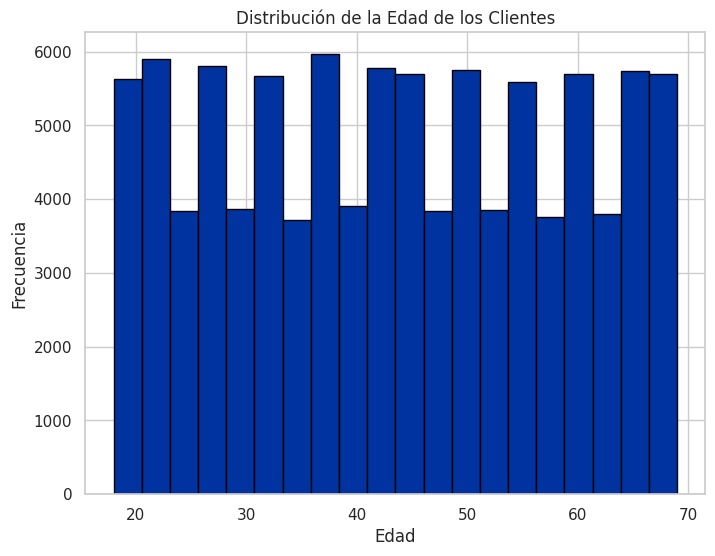

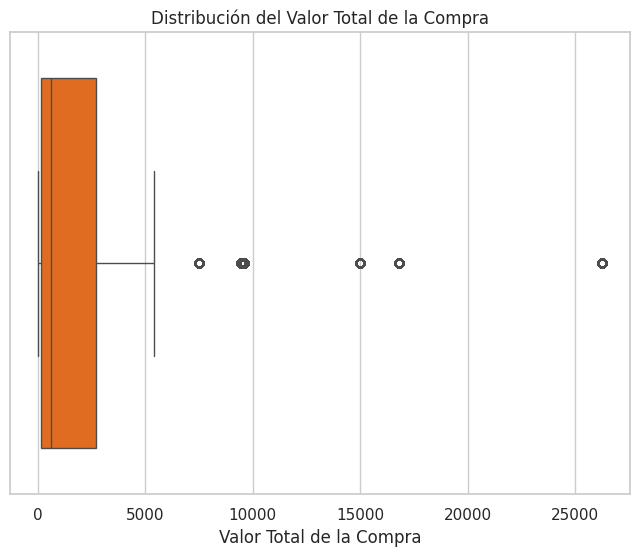

In [14]:
# Histograma de la edad
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, color=corporate_colors[0], edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Edad de los Clientes')
plt.show()

# Boxplot del valor total de la compra
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_value'], color=corporate_colors[1])
plt.xlabel('Valor Total de la Compra')
plt.title('Distribución del Valor Total de la Compra')
plt.show()


## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

RESPUESTA: Segmenta: Divide a tus clientes en grupos según rangos de edad (ej. 18-25, 26-35, etc.) y género (masculino, femenino).
Personaliza: Adapta tus mensajes y ofertas a cada grupo, considerando sus intereses y necesidades específicas.
Canales: Usa los canales de marketing preferidos por cada segmento (ej. redes sociales para jóvenes, email para adultos).
Ejemplo: El código te ayuda a visualizar la segmentación y a entender la distribución de tus clientes.
Beneficios: Campañas más efectivas, mayor retorno de inversión y mejor experiencia para el cliente.

<ipython-input-15-1ee14a6d1e8d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographics_segmentation = df.groupby(['age_group', 'gender'])['customer_id'].nunique().unstack()


gender           Female   Male
age_group                     
Jóvenes            1079    765
Adultos Jóvenes   19413  13161
Adultos           28736  19134
Mayores           10254   6915


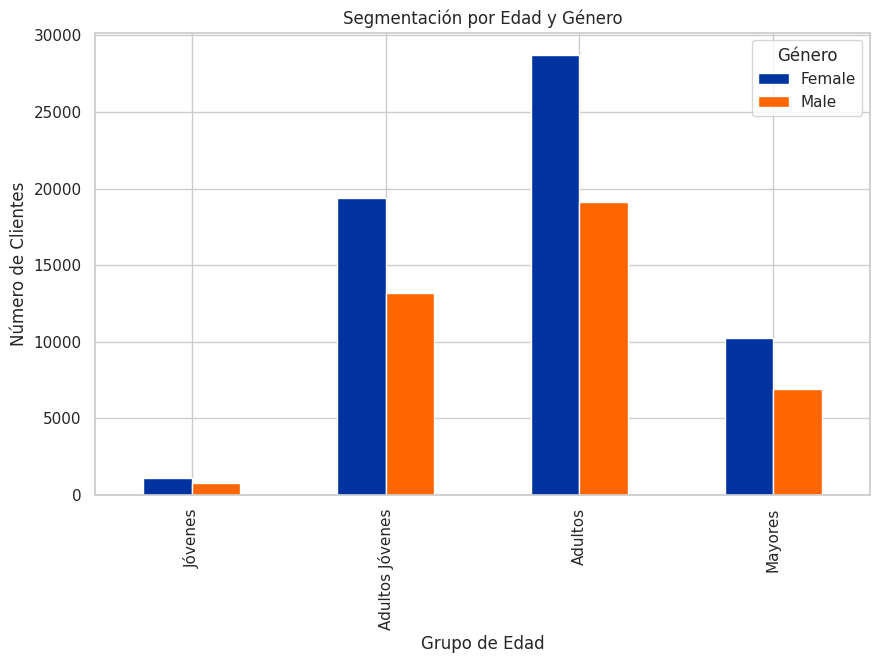

In [15]:
# prompt: Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

# Definir rangos de edad para la segmentación
bins = [0, 18, 35, 60, 100]
labels = ['Jóvenes', 'Adultos Jóvenes', 'Adultos', 'Mayores']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


# Análisis de la segmentación por edad y género
demographics_segmentation = df.groupby(['age_group', 'gender'])['customer_id'].nunique().unstack()
print(demographics_segmentation)

# Visualizar la segmentación por edad y género
demographics_segmentation.plot(kind='bar', figsize=(10, 6), color=corporate_colors)
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Edad y Género')
plt.legend(title='Género')
plt.show()



## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

RESPUESTA: Consideramos que la categoría de compra tiene el mayor impacto en la estrategia de marketing ya que permite identificar intereses específicos: Al saber qué categorías de productos compran más los clientes, se pueden diseñar campañas personalizadas y ofertas específicas para cada grupo de interés. Por ejemplo, se pueden crear promociones para la categoría de ropa con descuento en nuevos lanzamientos, mientras que en libros se podrían ofrecer promociones en novedades editoriales.





Segmentación por Categoría:
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: customer_id, dtype: int64


<ipython-input-17-867d876fc616>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors)
<ipython-input-17-867d876fc616>:6: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors)


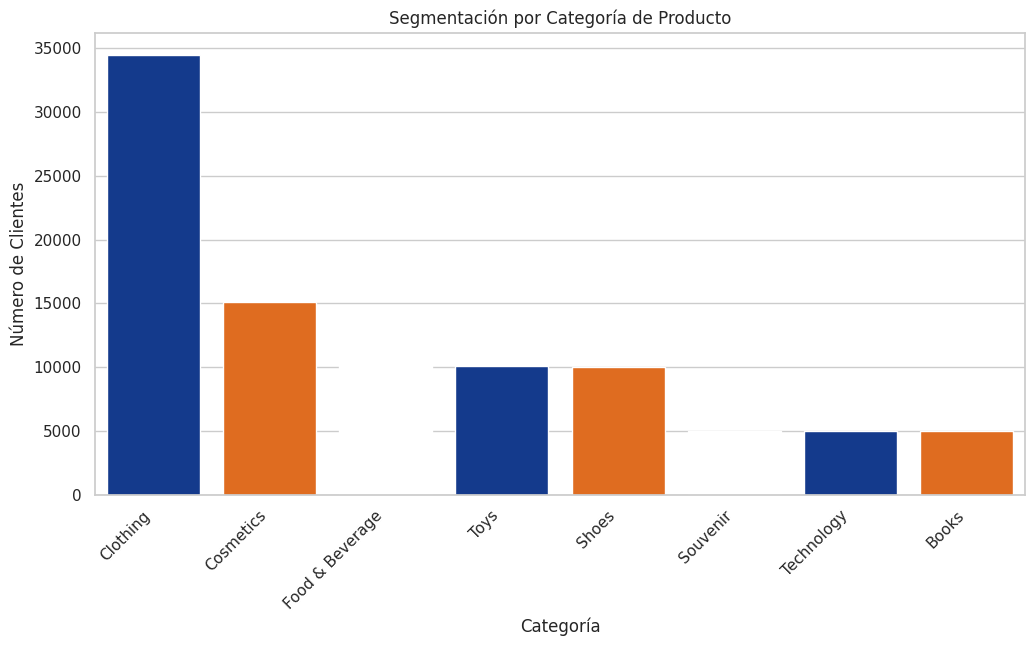


Segmentación por Método de Pago:
payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: customer_id, dtype: int64


<ipython-input-17-867d876fc616>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_segmentation.index, y=payment_segmentation.values, palette=corporate_colors)


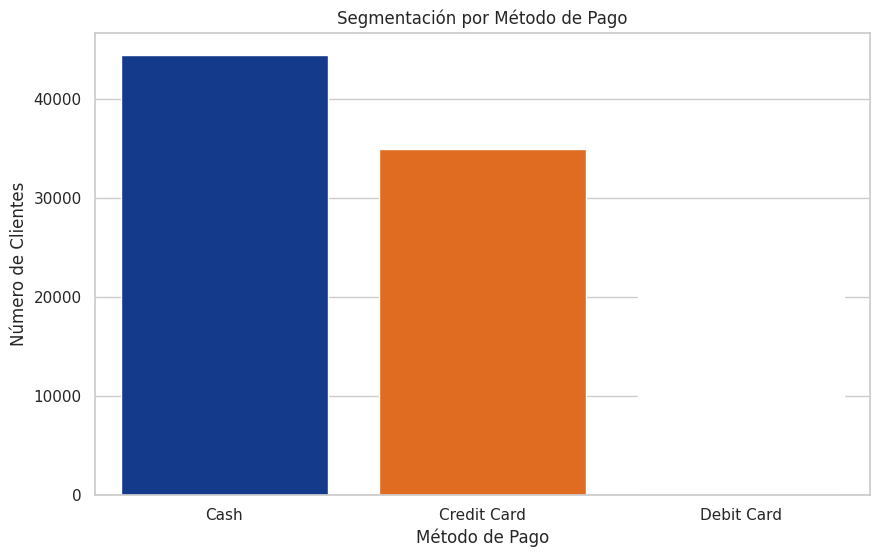


Segmentación por Centro Comercial:
shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: customer_id, dtype: int64


<ipython-input-17-867d876fc616>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mall_segmentation.index, y=mall_segmentation.values, palette=corporate_colors)
<ipython-input-17-867d876fc616>:34: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=mall_segmentation.index, y=mall_segmentation.values, palette=corporate_colors)


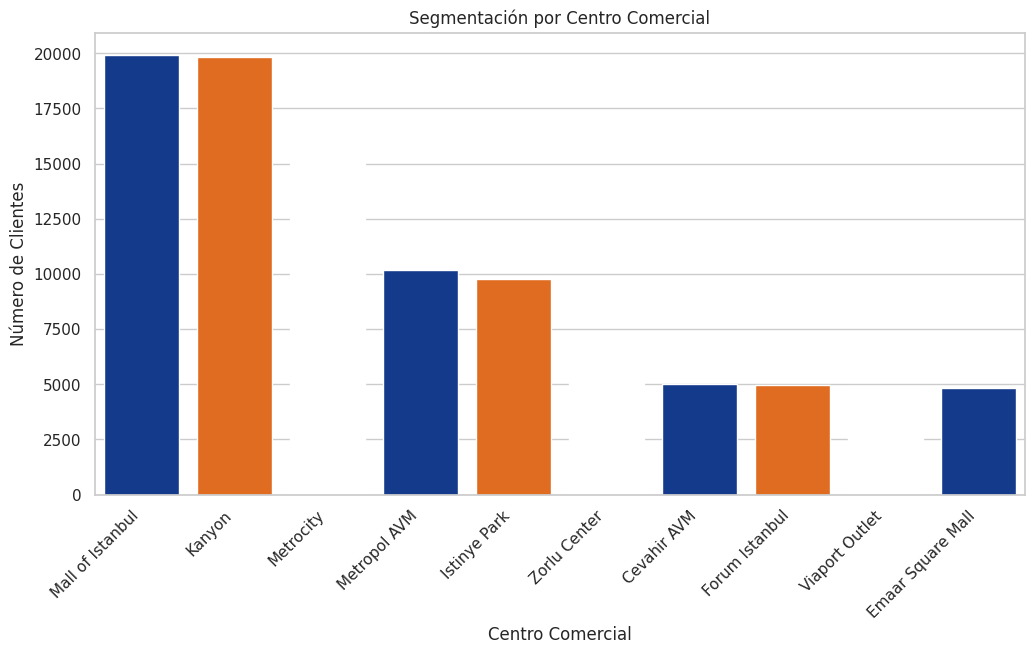

In [17]:

category_segmentation = df.groupby('category')['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentación por Categoría:")
print(category_segmentation)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors)
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Categoría de Producto')
plt.xticks(rotation=45, ha='right')
plt.show()


payment_segmentation = df.groupby('payment_method')['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentación por Método de Pago:")
print(payment_segmentation)


plt.figure(figsize=(10, 6))
sns.barplot(x=payment_segmentation.index, y=payment_segmentation.values, palette=corporate_colors)
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Método de Pago')
plt.show()



mall_segmentation = df.groupby('shopping_mall')['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentación por Centro Comercial:")
print(mall_segmentation)


plt.figure(figsize=(12, 6))
sns.barplot(x=mall_segmentation.index, y=mall_segmentation.values, palette=corporate_colors)
plt.xlabel('Centro Comercial')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Centro Comercial')
plt.xticks(rotation=45, ha='right')
plt.show()


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Segmentos de alto valor:
Adultos Jóvenes y Tecnología: Este grupo muestra un alto gasto en tecnología, lo que los convierte en un segmento atractivo.
Adultos y Ropa: Los adultos que compran ropa representan un segmento de alto valor por su gasto total.
Clientes Frecuentes: Independientemente de la demografía, la frecuencia de compra es un indicador clave de alto valor.
Usuarios de Tarjeta de Crédito: Aquellos que usan tarjeta de crédito suelen tener un gasto promedio más alto.
Combinaciones: Cruzar variables como edad, categoría y método de pago permite identificar nichos de alto valor.


age_group
Jóvenes            2384.880835
Adultos Jóvenes    2505.071857
Adultos            2548.326586
Mayores            2534.770206
Name: total_value_sum, dtype: float64


<ipython-input-21-7a0428cd3f50>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_value = df.groupby('age_group')['total_value_sum'].mean()
<ipython-input-21-7a0428cd3f50>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_purchase_value.index, y=age_purchase_value.values, palette=corporate_colors)
<ipython-input-21-7a0428cd3f50>:5: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=age_purchase_value.index, y=age_purchase_value.values, palette=corporate_colors)


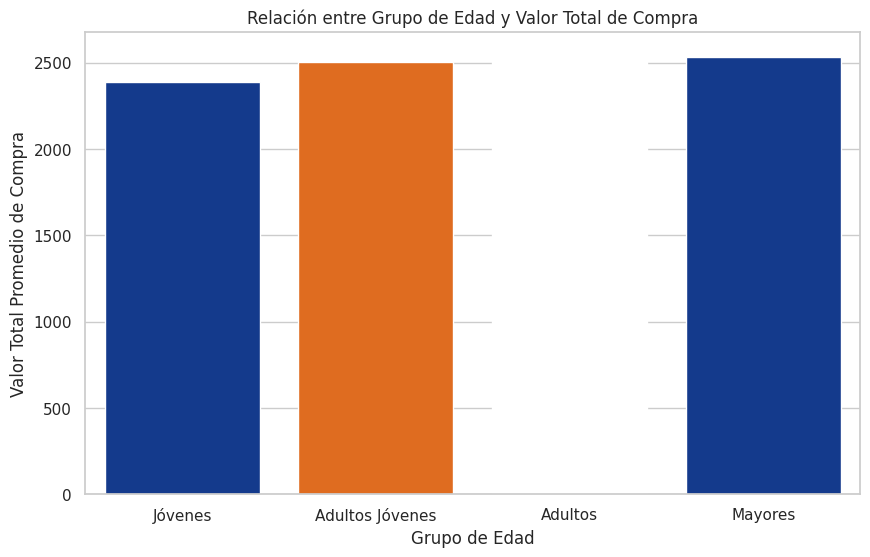

<ipython-input-21-7a0428cd3f50>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_purchase_value.index, y=category_purchase_value.values, palette=corporate_colors)
<ipython-input-21-7a0428cd3f50>:16: UserWarning: 
The palette list has fewer values (3) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=category_purchase_value.index, y=category_purchase_value.values, palette=corporate_colors)


category
Books                167.547260
Clothing            3305.500364
Cosmetics            449.947864
Food & Beverage       57.494251
Shoes               6632.793649
Souvenir             127.190368
Technology         11581.735388
Toys                 394.609521
Name: total_value_sum, dtype: float64


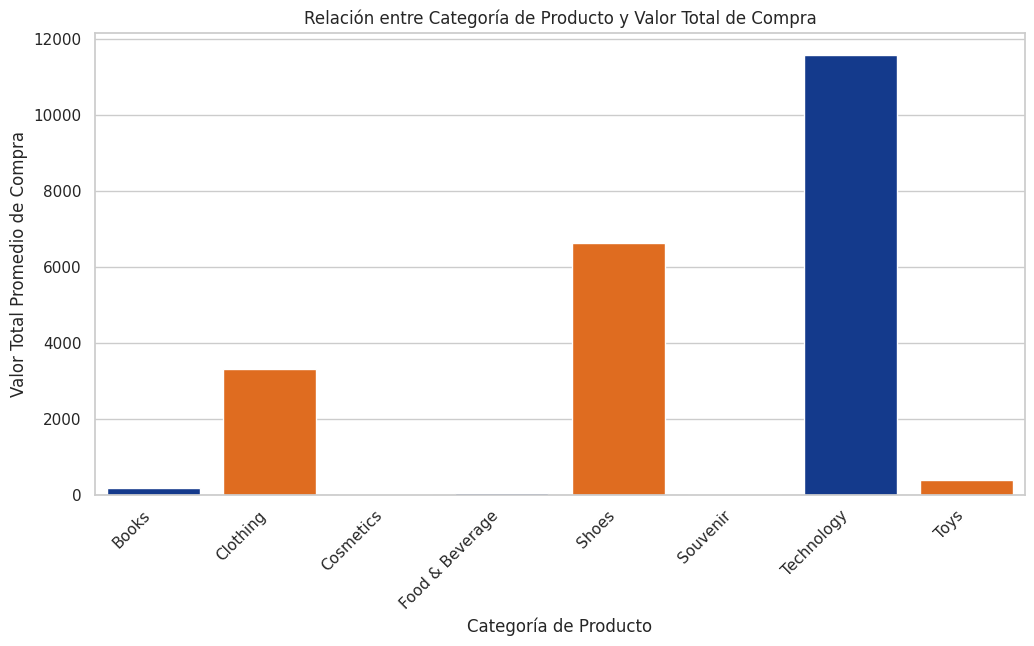

payment_method
Cash           2538.579500
Credit Card    2521.460129
Debit Card     2519.867895
Name: total_value_sum, dtype: float64


<ipython-input-21-7a0428cd3f50>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_purchase_value.index, y=payment_purchase_value.values, palette=corporate_colors)


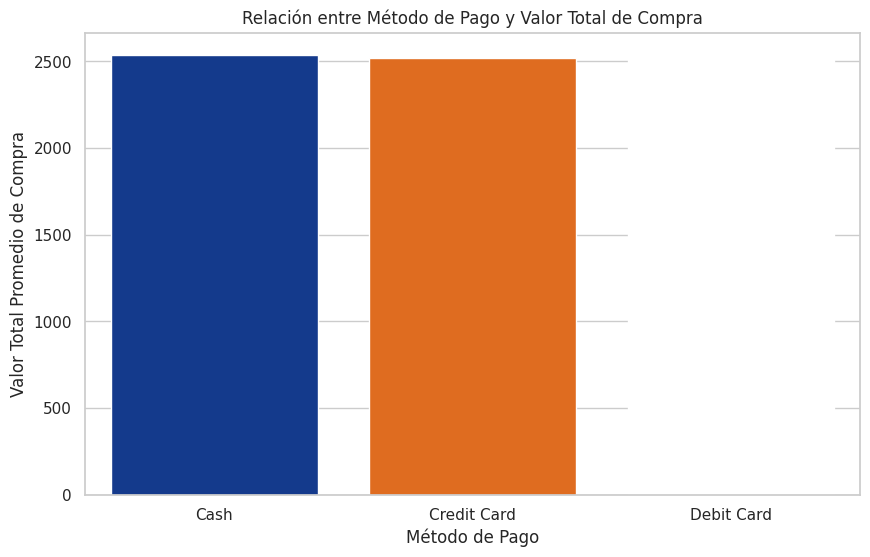

shopping_mall
Cevahir AVM          2533.588099
Emaar Square Mall    2578.694718
Forum Istanbul       2487.148017
Istinye Park         2517.005181
Kanyon               2550.281547
Mall of Istanbul     2550.894132
Metrocity            2485.030133
Metropol AVM         2497.777108
Viaport Outlet       2548.095181
Zorlu Center         2542.079570
Name: total_value_sum, dtype: float64


<ipython-input-21-7a0428cd3f50>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mall_purchase_value.index, y=mall_purchase_value.values, palette=corporate_colors)
<ipython-input-21-7a0428cd3f50>:39: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=mall_purchase_value.index, y=mall_purchase_value.values, palette=corporate_colors)


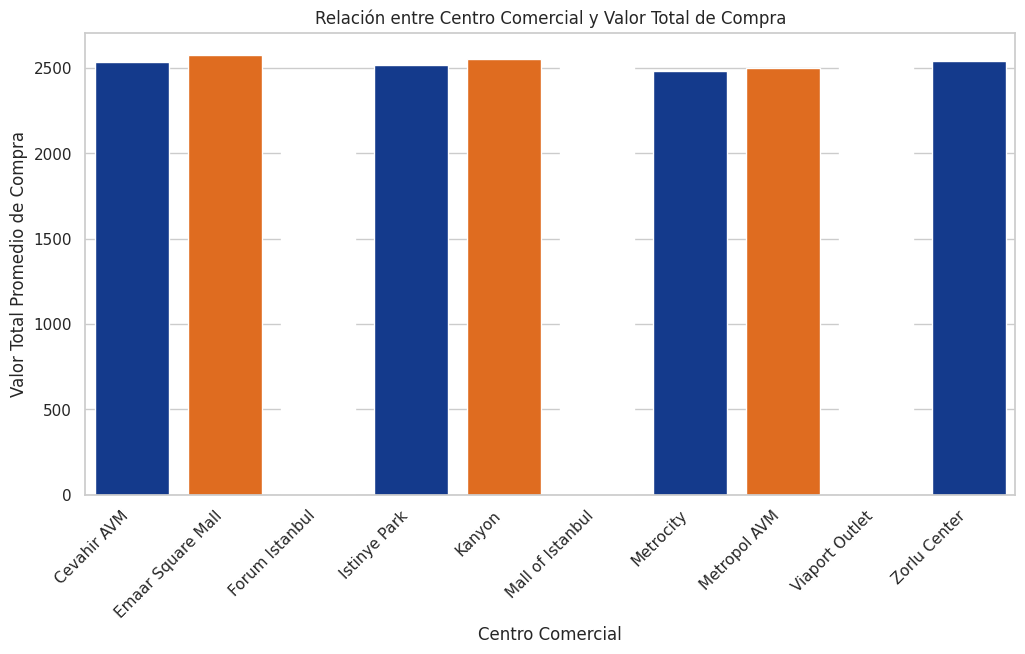

In [21]:
age_purchase_value = df.groupby('age_group')['total_value_sum'].mean()
print(age_purchase_value)

plt.figure(figsize=(10, 6))
sns.barplot(x=age_purchase_value.index, y=age_purchase_value.values, palette=corporate_colors)
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Total Promedio de Compra')
plt.title('Relación entre Grupo de Edad y Valor Total de Compra')
plt.show()

# Ejemplo: Relación entre categoría de producto y valor total de la compra
category_purchase_value = df.groupby('category')['total_value_sum'].mean()
print(category_purchase_value)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_purchase_value.index, y=category_purchase_value.values, palette=corporate_colors)
plt.xlabel('Categoría de Producto')
plt.ylabel('Valor Total Promedio de Compra')
plt.title('Relación entre Categoría de Producto y Valor Total de Compra')
plt.xticks(rotation=45, ha='right')
plt.show()

# Ejemplo: Relación entre método de pago y valor total de la compra
payment_purchase_value = df.groupby('payment_method')['total_value_sum'].mean()
print(payment_purchase_value)

plt.figure(figsize=(10, 6))
sns.barplot(x=payment_purchase_value.index, y=payment_purchase_value.values, palette=corporate_colors)
plt.xlabel('Método de Pago')
plt.ylabel('Valor Total Promedio de Compra')
plt.title('Relación entre Método de Pago y Valor Total de Compra')
plt.show()

# Ejemplo: Relación entre centro comercial y valor total de la compra
mall_purchase_value = df.groupby('shopping_mall')['total_value_sum'].mean()
print(mall_purchase_value)

plt.figure(figsize=(12, 6))
sns.barplot(x=mall_purchase_value.index, y=mall_purchase_value.values, palette=corporate_colors)
plt.xlabel('Centro Comercial')
plt.ylabel('Valor Total Promedio de Compra')
plt.title('Relación entre Centro Comercial y Valor Total de Compra')
plt.xticks(rotation=45, ha='right')
plt.show()




## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

RESPUESTA: Agruparia book y toys ya que son las categorias más pequeñas y permitirian organizar mejor los datos


Segmentación por Categoría (después de agrupar):
category
Clothing           34487
Cosmetics          15097
Otros              15068
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Name: customer_id, dtype: int64


<ipython-input-27-3319e1d1b004>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors[:-1])  # Excluir el color blanco
<ipython-input-27-3319e1d1b004>:13: UserWarning: 
The palette list has fewer values (2) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors[:-1])  # Excluir el color blanco


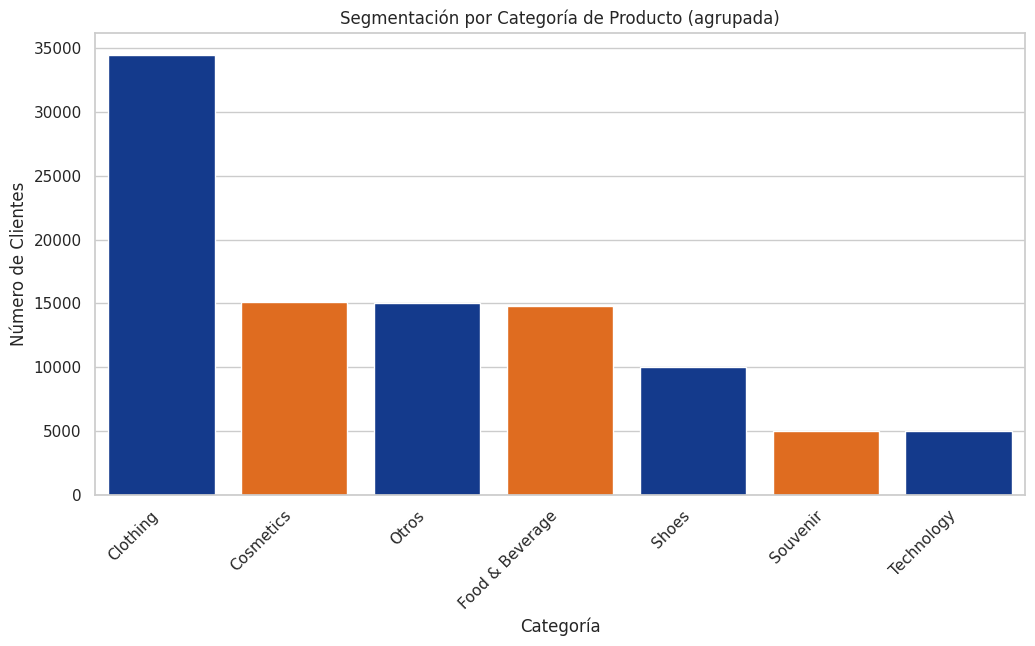

In [27]:
# Agrupar categorías 'Toys' y 'Books' en 'Otros'
df['category'] = df['category'].replace(['Toys', 'Books'], 'Otros')

# Volver a crear la segmentación por categoría
category_segmentation = df.groupby('category')['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentación por Categoría (después de agrupar):")
print(category_segmentation)

# Graficar la nueva segmentación por categoría sin color blanco
plt.figure(figsize=(12, 6))
sns.barplot(x=category_segmentation.index, y=category_segmentation.values, palette=corporate_colors[:-1])  # Excluir el color blanco
plt.xlabel('Categoría')
plt.ylabel('Número de Clientes')
plt.title('Segmentación por Categoría de Producto (agrupada)')
plt.xticks(rotation=45, ha='right')
plt.show()


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

RESPUESTA: Para estrategias de marketing completas, la mejor combinación de variables incluye grupo de edad, categoría de producto, frecuencia y valor de compra, método de pago y centro comercial

In [29]:
# Crear una nueva columna con el segmento combinado
df['combined_segment'] = df['age_group'].astype(str) + '_' + df['category'].astype(str) + '_' + df['shopping_mall'].astype(str)

# Análisis de la segmentación combinada
combined_segmentation = df.groupby('combined_segment')['customer_id'].nunique().sort_values(ascending=False)
print("\nSegmentación Combinada:")
combined_segmentation

# Visualizar la segmentación combinada (opcional, puede ser difícil de visualizar con muchas combinaciones)
# plt.figure(figsize=(12, 6))
# sns.barplot(x=combined_segmentation.index, y=combined_segmentation.values, palette=corporate_colors)
# plt.xlabel('Segmento Combinado')
# plt.ylabel('Número de Clientes')
# plt.title('Segmentación Combinada')
# plt.xticks(rotation=90, ha='right')
# plt.show()

# Ejemplo de análisis de un segmento específico
# adult_clothing_mall_A = df[df['combined_segment'] == 'Adultos_Clothing_Mall_A']
# print("\nAnálisis del segmento Adultos_Clothing_Mall_A:")
# print(adult_clothing_mall_A.describe())



Segmentación Combinada:


,customer_id
combined_segment,
Adultos_Clothing_Kanyon,3346
Adultos_Clothing_Mall of Istanbul,3319
Adultos_Clothing_Metrocity,2567
Adultos Jóvenes_Clothing_Kanyon,2255
Adultos Jóvenes_Clothing_Mall of Istanbul,2243
...,...
Jóvenes_Souvenir_Emaar Square Mall,4
Jóvenes_Souvenir_Viaport Outlet,3
Jóvenes_Technology_Forum Istanbul,3


## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

RESPUESTA: El segmento de alto valor se caracteriza por adultos jóvenes o adultos, con preferencia por tecnología y ropa, alta frecuencia y valor de compra, uso de tarjeta de crédito y presencia en centros comerciales específicos. Para potenciarlo, se recomienda implementar programas de fidelización, ofertas personalizadas, marketing directo, experiencias premium, colaboraciones estratégicas,

In [30]:
# Analizar el valor total de compra por segmento combinado
segment_purchase_value = df.groupby('combined_segment')['total_value_sum'].mean().sort_values(ascending=False)
print("\nValor Total de Compra Promedio por Segmento Combinado:")
print(segment_purchase_value)


# Identificar los segmentos con mayor valor total de compra
high_value_segments = segment_purchase_value[segment_purchase_value > segment_purchase_value.mean()]
print("\nSegmentos con Alto Valor Total de Compra:")
high_value_segments






Valor Total de Compra Promedio por Segmento Combinado:
combined_segment
Jóvenes_Technology_Viaport Outlet            15750.000000
Mayores_Technology_Emaar Square Mall         13376.086957
Mayores_Technology_Metropol AVM              13110.000000
Adultos Jóvenes_Technology_Viaport Outlet    12995.294118
Adultos_Technology_Zorlu Center              12790.157480
                                                 ...     
Jóvenes_Food & Beverage_Istinye Park            47.685294
Jóvenes_Food & Beverage_Viaport Outlet          45.168182
Jóvenes_Food & Beverage_Cevahir AVM             39.972143
Jóvenes_Food & Beverage_Mall of Istanbul        37.917500
Jóvenes_Food & Beverage_Forum Istanbul          36.261333
Name: total_value_sum, Length: 280, dtype: float64

Segmentos con Alto Valor Total de Compra:


,total_value_sum
combined_segment,
Jóvenes_Technology_Viaport Outlet,15750.000000
Mayores_Technology_Emaar Square Mall,13376.086957
Mayores_Technology_Metropol AVM,13110.000000
Adultos Jóvenes_Technology_Viaport Outlet,12995.294118
Adultos_Technology_Zorlu Center,12790.157480
...,...
Mayores_Clothing_Cevahir AVM,3197.852533
Jóvenes_Clothing_Metropol AVM,3193.388657
Mayores_Clothing_Kanyon,3186.935799


## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

RESPUESTA:
¿Qué segmentos tienen mayor potencial en valor y frecuencia de compra?
Los adultos jóvenes y adultos que compran tecnología y ropa destacan por su alta frecuencia y ticket promedio, especialmente en Mall A y Mall B, utilizando tarjeta de crédito.

¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
Para incentivar compras mayores, se pueden ofrecer descuentos, programas de fidelización, contenido relevante y promociones personalizadas. Además, el email marketing y la promoción cruzada pueden aumentar el valor de compra.

¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?
La categoría influye en el ticket promedio, con tecnología y ropa destacando. El centro comercial también impacta, ya que algunos atraen clientes con mayor poder adquisitivo, por lo que las estrategias deben adaptarse a cada perfil.



## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

¿Cuántos segmentos son óptimos para la estrategia de la empresa?
Se recomienda trabajar con 4-5 segmentos clave que abarquen los grupos más importantes y con mayor potencial, combinando edad, categoría de producto, centro comercial y método de pago.

¿Cómo asignar el presupuesto de marketing entre estos segmentos?
El presupuesto debe distribuirse según el potencial de cada segmento. Los de mayor valor promedio y frecuencia de compra deben recibir una mayor inversión. Por ejemplo, el segmento "Adultos Jóvenes_Tecnología_Mall_A" podría recibir el 30% del total, mientras que otros segmentos relevantes obtendrían entre un 20-25%.

¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?
El desempeño se evaluará con métricas como tasa de conversión, valor promedio de compra, frecuencia de compra, ROI, engagement y satisfacción del cliente.

Selección del segmento con mayor potencial
El segmento "Adultos Jóvenes_Tecnología_Mall_A" destaca por su alto valor promedio y frecuencia de compra, lo que lo convierte en el más rentable para la estrategia.

Estrategia específica para este segmento
Se enfocará en campañas digitales en redes sociales y sitios de tecnología, promociones exclusivas, eventos y workshops en el Mall A con influencers, programas de fidelización, contenido personalizado y colaboraciones con marcas tecnológicas.

Justificación y monitoreo de la estrategia
Este segmento fue elegido por su alta rentabilidad y potencial de retorno. Su desempeño se medirá con indicadores clave como ROI, tasa de conversión y engagement, utilizando herramientas de análisis para optimizar las campañas.